<a href="https://colab.research.google.com/github/jennif8r/RedeNeural/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Neurônio artificial**
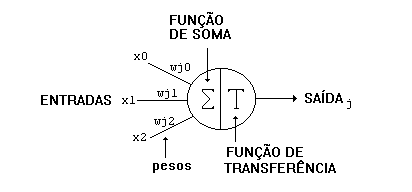

- 1943: McCulloch e Pitts




##Tipos de Rede Neural

Existe *alguns tipos de rede neural*, o primeiro modelo capaz de aprender peso sinápticos automaticamente através de um algoritmo de aprendizado supervisionado foi o *PERCEPTRON* criado em 1957. Com isso vamos começar com o Perceptron e indo progredindo.

###Uma camada (Perceptron simples)
Modelo mais simples do perceptron, constituido por uma camada capaz de resolver problemas de **classificação linear separáveis**.
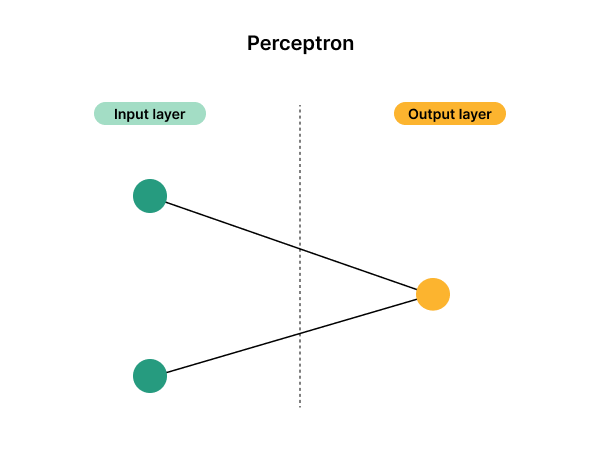

####1. **Função da Soma**

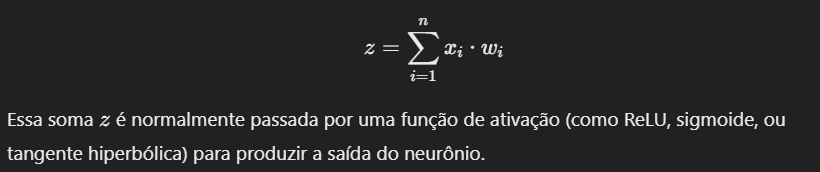
  - Z: a soma ponderada (saída antes de passar por uma função de ativação);
  - Xi: **o valor** da i-ésima entrada (input);
  - Wi: o **peso** associado à i-ésima entrada;
  - n: o número de entradas para o neurônio.


A **somatória** é um operador matemático que representa a soma de uma sequência de valores. Na notação usual, temos:

1. **Início e fim da somatória**:
   - O índice **i** começa em 1 (\(i = 1\)) e vai até **n**, onde \(n\) é o número total de elementos.

2. **Multiplicação em cada passo**:
   - Para cada valor de \(i\), multiplicamos \(Xi\) (um valor do conjunto \(X\)) pelo correspondente \(Wi\) (um valor do conjunto \(W\), que geralmente representa os pesos).

3. **Somando os resultados**:
   - Após realizar todas as multiplicações (X1* W1 + X2 * W2...+ Xn*Wn), somamos todos esses produtos.



#####2. **Função de ativação**

As funções de ativação são um elemento extremamente importante das redes neurais artificiais. Elas basicamente decidem se um neurônio deve ser ativado ou não. Ou seja, se a informação que o neurônio está recebendo é relevante para a informação fornecida ou deve ser ignorada.


######2.1 Função de ativação do Perceptron simples (uma camada):

 -Step Function (função Degrau)
   Maior do que Zero = 1 *Caso* contrário = 0.
   Ou seja, representação "Tudo ou nada" (Binário).
    - É uma função de ativação original do perceptron (1958).Ou seja, REFERENTE ao neurônio artificial mais simples.
    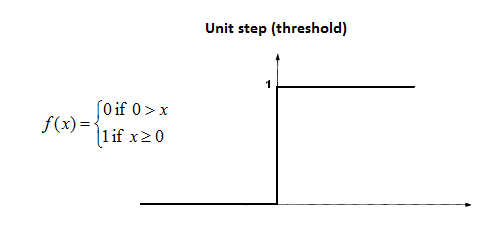

  - Podemos encontrar um neurônio artificial definido como segue abaixo, onde sabemos que a função de ativação é a step function (função degrau) REFERENTE AO PERCEPTRON:

  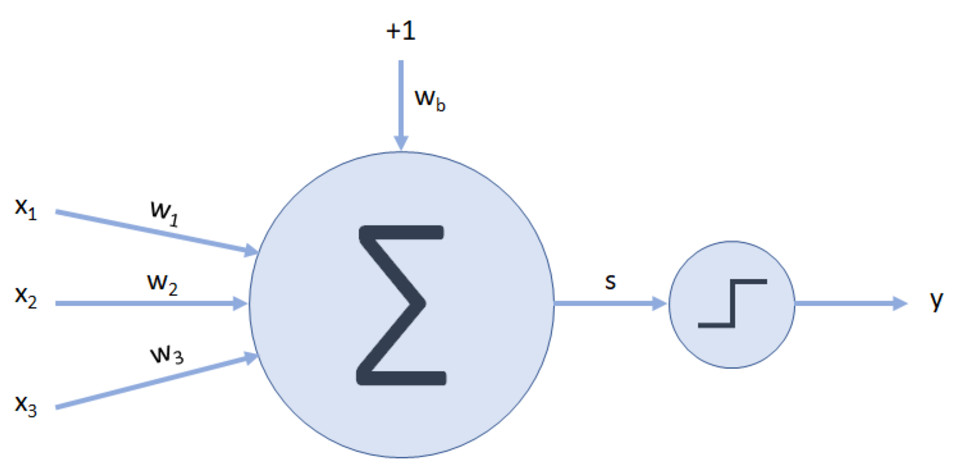

#####Exemplo feito manualmente:
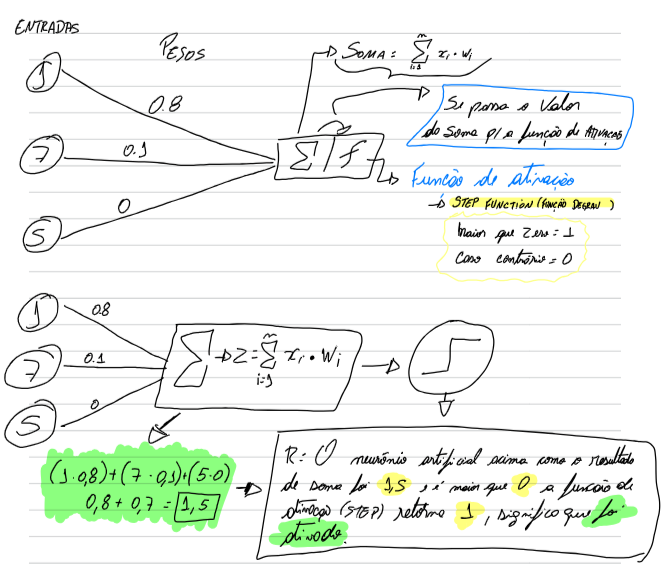

####Função de ativação: **Step Funcion (Função degrau)**
OBS: Estamos fazendo o código que  realiza a ativação de um **perceptron em uma camada simples** de uma rede neural.
 - Agora iremos fazer via código.

#####Implementação básica:

In [ ]:
entradas = [1, 7, 5]

pesos = [0.8,0.1,0]

def soma(e, p):
  s = 0
  for i in range(3):
    print("entradas", entradas[i])
    print("pesos",pesos[i])
    s += e[i] * p[i]
  return s

s = soma(entradas, pesos)
print("soma da rede neural: ", s)

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

# Passar o valor da soma para a função de ativação:
r = stepFunction(s)

print("resultado da função de ativação: ", r)

entradas 1
pesos 0.8
entradas 7
pesos 0.1
entradas 5
pesos 0
soma da rede neural:  1.5
resultado da função de ativação:  1


###### Agora iremos ultilizar a biblioteca Numpy para melhora nosso código.
 - Motivo de melhorar na nossa **função de soma**, pois o codigo acima não é a melhor forma de fazermos esse processamento principalmente quando for trabalhar com grande volume de dados (big data). Com isso a rede neural vai ser lenta, e precisamos otimizar.


In [ ]:
import numpy as np

entradas = np.array([1, 7, 5])

pesos = np.array([0.8,0.1,0])

def soma(e, p):
  return e.dot(p)  #dot_product / produto escalar

s = soma(entradas, pesos)

print("soma da rede neural: ", s)

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

# Passar o valor da soma para a função de ativação:
r = stepFunction(s)

print("resultado da função de ativação: ", r)

soma da rede neural:  1.5
resultado da função de ativação:  1


####***Ajustes dos Pesos (Perceptron usando a base do Operador Lógico E)***
O processo de *treinamento* de uma rede neural envolve o ajuste dos pesos para que a saída da rede se aproxime do resultado esperado.



***Explicação via calculo do Funcionamento (Parte teorica)***
1. Inicializamos os pesos e o bias com valores aleatórios ou zeros.
2. Calculamos a saída do perceptron aplicando a soma ponderada das entradas pelos pesos e adicionando o bias.
3. Utilizamos uma função de ativação (como o degrau) para determinar a saída binária.
4. Comparamos a saída calculada com a saída esperada (target) e calculamos o erro.
***Exemplo para adicionar que está no goodnode***

Esse processo é repetido para todas as amostras da base de dados até que os pesos sejam ajustados corretamente.

**Implementação em Python**

Ajustes dos Pesos (Perceptron usando a base do Operador Lógico E)
Agora, vamos implementar o mesmo processo descrito acima utilizando Python.

Este código irá demonstrar como o perceptron aprende a resolver o operador lógico **E**.


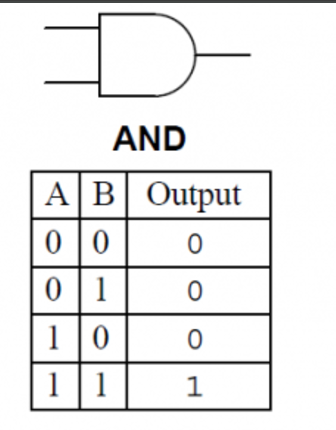

Abaixo está a implementação em Python:

**Referente a função treinamento o Algoritmo**
 - Enquanto o erro for diferente de zero
    - Para cada registro:
      - Calcula a saída com os pesos atuais
      - Compara a *saída esperada* com a *Saída calculada*, somando o *erro*
      - Para cada peso da rede:
        - Atualiz o peso - peso(n+1) = peso(n)+(taxaAprendizagem*entrada*erro)


In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,0,0,1])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Total de erros: 1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erros: 1
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Total de erros: 1
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erros: 1
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Pe

Este código irá demonstrar como o perceptron aprende a resolver o operador lógico **OR**. Abaixo está a implementação em Python:
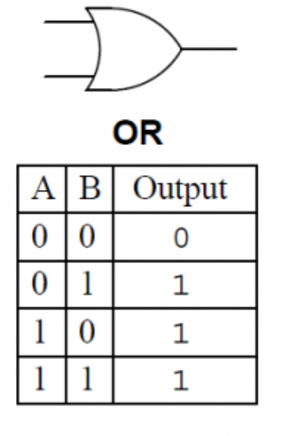

In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,1,1,1])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erros: 3
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erros: 3
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Total de erros: 2
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Total de erros: 2
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Total de erros: 2
Peso atualizado: 0.7
P

#####Test de mesa
 - Já que encontramos o valor do peso iremos fazer o calculo na mão e ver:


-ADICIONAR O QUE ESTÁ NO GOODNOTE-

**Usando o operador logico XOR:**


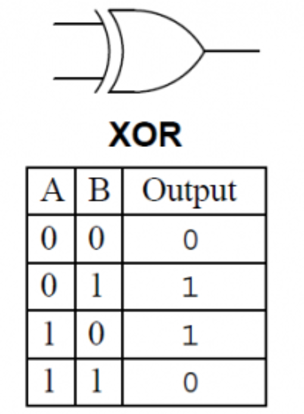

Código python:

O perceptron não consegue resolver XOR, então ele irá ficar em loop

In [ ]:
import numpy as np

entradas = np.array([[0,0],[0,1],[1,0],[1,1]])

saidas = np.array([0,1,1,0])

pesos = np.array([0.0, 0.0])

taxaAprendizagem = 0.1 #O dev que defini por padrão usar 0.1 ou 0.0001

def stepFunction(soma):
    if(soma >= 1):
      return 1
    return 0

def calculaSaida(registro):
  s = registro.dot(pesos)
  return stepFunction(s)

# Se colocarmos o erro = 0  a gente espera que a rede neural tenha 100% de acerto, o que em um grande conjunto de dados é impossivel.
def treinar():
  erroTotal = 1
  while(erroTotal != 0):
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calculaSaida(np.asarray(entradas[i]))
      erro = abs(saidas[i] - saidaCalculada)
      erroTotal += erro
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
        print("Peso atualizado: " + str(pesos[j]))

    print("Total de erros: " + str(erroTotal))

treinar()
print("Rede neural treinada")

A saída de streaming foi truncada nas últimas 5000 linhas.
Total de erros: 1
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.400000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Total de erros: 1
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.500000001926
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Total de erros: 1
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.600000001927
Peso atualizado: 5348.700000001927
Peso atualizado: 5348.700000001927
Total de erros: 1
Peso atualizado: 5348.7000000

KeyboardInterrupt: 

**Explicação**

Adicionar aqui a explicação que está no goodnote

**Resumo**

- Redes de camada única, como o perceptron, só resolvem problemas linearmente separáveis.

- Redes de camada única com funções de ativação diferenciáveis podem aproximar problemas mais complexos, mas ainda têm limitações.

- Para resolver problemas não linearmente separáveis de forma robusta, é necessário usar redes com mais de uma camada (redes multicamadas).

###Redes neurais **Multicamadas**


_ Add o print do goodnote de introdução _

_Tipos de funções add print do goodnote_

####Função de ativação: **Sigmoid (Função sigmoide)**

Implementação da função Sigmoide em python:

In [ ]:
import numpy as np

def sigmoid(soma):
  return 1 / (1 + np.exp(-soma))

#base de dados operador XOR
entradas = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

saidas =np.array([[0],[1],[1],[0]])

#pesos aleatorio

pesos0 = np.array([[-0.424,-0.740,-0.961],
                  [0.358,-0.577,-0.469]])

pesos1 = np.array([[-0.017],[-0.893],[0.148]])

epocas = 100 #quantidade de vezes que eu vou passar as rodadas atualizando os pesos.

for J in range(epocas):
  camadaEntrada = entradas
  somaSinapse0 = np.dot(camadaEntrada,pesos0)
  camadaOculta = sigmoid(somaSinapse0)
  somaSinapse1 = np.dot(camadaOculta,pesos1)
  camadaSaida = sigmoid(somaSinapse1)

print(somaSinapse0)


[[ 0.     0.     0.   ]
 [ 0.358 -0.577 -0.469]
 [-0.424 -0.74  -0.961]
 [-0.066 -1.317 -1.43 ]]


#####Adicionar o calculo no goodnote, soma até a camada ocuta que o valor deu 0,5

In [ ]:
#resultado da camadaOculta
print(camadaOculta)

[[0.5        0.5        0.5       ]
 [0.5885562  0.35962319 0.38485296]
 [0.39555998 0.32300414 0.27667802]
 [0.48350599 0.21131785 0.19309868]]


#####Adicionar o calculo no goodnote da camada oculta até a saida:(calculo camada oculta)

In [ ]:
print("soma da camada oculta para a saida",somaSinapse1)

soma da camada oculta para a saida [[-0.381     ]
 [-0.27419072]
 [-0.25421887]
 [-0.16834784]]


######Calcular o erro

In [ ]:
import numpy as np

def sigmoid(soma):
  return 1 / (1 + np.exp(-soma))

#base de dados operador XOR
entradas = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

saidas =np.array([[0],[1],[1],[0]])

#pesos aleatorio

pesos0 = np.array([[-0.424,-0.740,-0.961],
                  [0.358,-0.577,-0.469]])

pesos1 = np.array([[-0.017],[-0.893],[0.148]])

epocas = 100 #quantidade de vezes que eu vou passar as rodadas atualizando os pesos.

for J in range(epocas):
  camadaEntrada = entradas
  somaSinapse0 = np.dot(camadaEntrada,pesos0)
  camadaOculta = sigmoid(somaSinapse0)
  somaSinapse1 = np.dot(camadaOculta,pesos1)
  camadaSaida = sigmoid(somaSinapse1)
#somando o erro
erroCamadaSaida = (saidas - camadaSaida)
mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
print(mediaAbsoluta)


0.49880848923713045


Algoritmo:

Usando como base de dados o XOR

1 - iniciar os pesos com valores aleatórios (feito acima).

2 - Baseado nos dados (aprendizagem supervisionada), realiza os calculos com os pesos e calcula o erro.

3 - Calcula as mudanças nos pesos e os atualiza (backpropagation -> iremos ver)

4- O algoritimo termina quando o erro é pequeno.


OBS: Cost function (função de custo) é basicamente a função de erro.

**Para fazer atualização de pessos:**
temos novos conceitos como

- Gradiente (gradient descent)
- Derivada
- Calculo do delta
- Backpropagation
- Learning rate (taxa de aprendizagem)
- Momentum (momento)

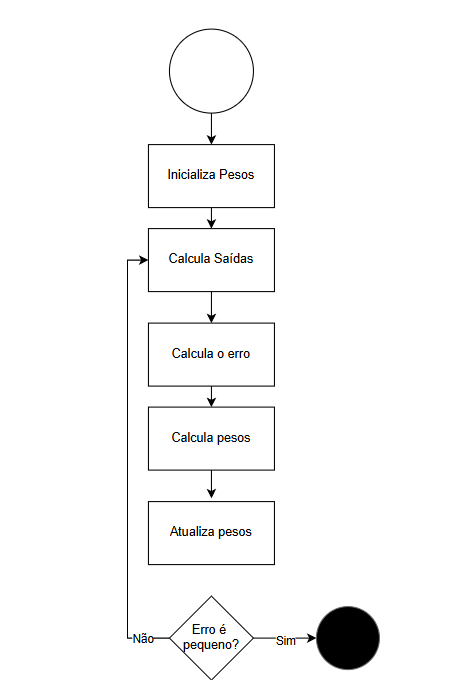



**Gradiente**
- minC(W1,W2 ...Wn)
- Calcular a derivada parcial para mover para a direção do gradiente.
- Gradiente: Ferramenta que indica como ajustar os pesos para minimizar o erro.
- Objetivo Principal: Encontrar a combinação de pesos que resulte no menor erro possível.
- Método Comum: Descida do gradiente, que utiliza derivadas parciais para atualizar os pesos.
- Outras Abordagens:
  - Força Bruta: Não prática para redes neurais.
  - Simulated Annealing: Útil para evitar mínimos locais.
  - Algoritmos Genéticos: Exploram o espaço de soluções de forma evolutiva.

O Gradiente é calculado para saber quanto ajustar os pesos
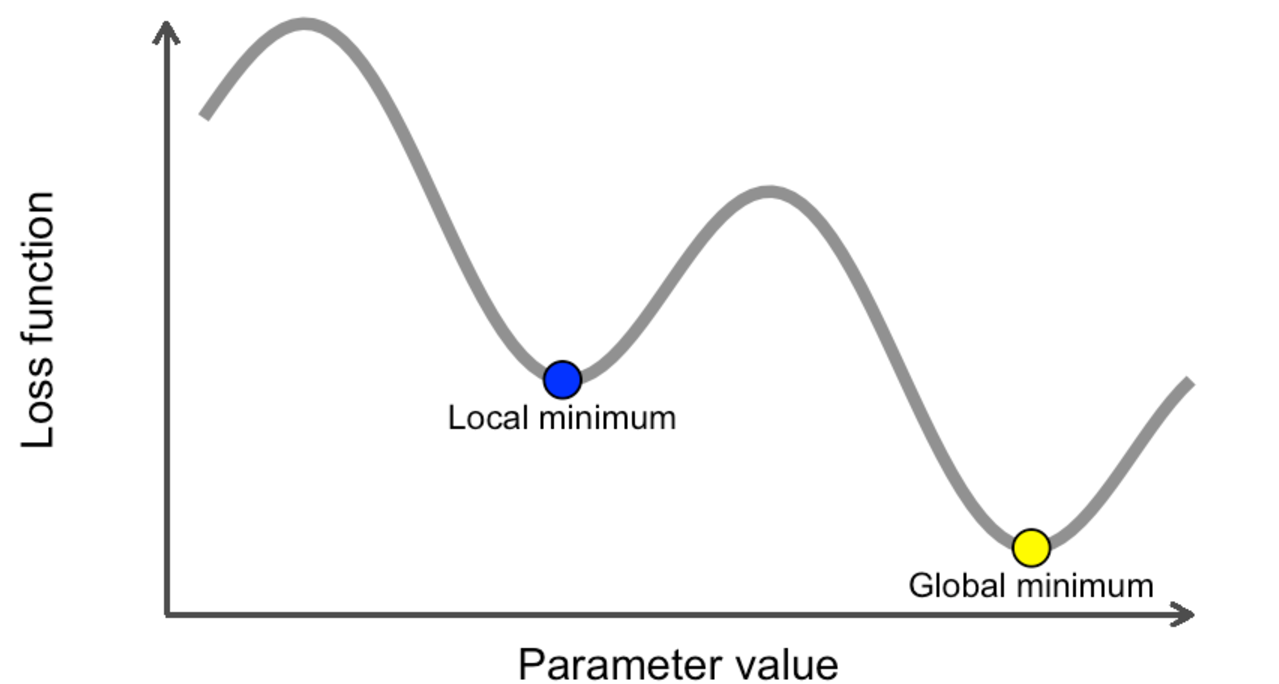


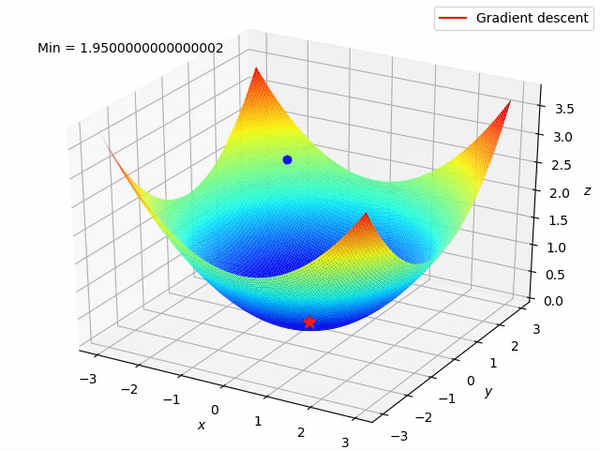

Calulo do Delta:

DeltaSaída = Erro * DerivadaSigmoide

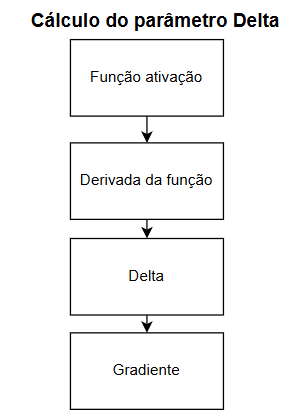

DeltaEscondida = DerivadaSigmoide * peso * DeltaSaída

In [ ]:
import numpy as np

def sigmoid(soma):
  return 1 / (1 + np.exp(-soma))


def sigmoidDerivada(sig):
  return sig * (1 - sig)

#base de dados operador XOR
entradas = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

saidas =np.array([[0],[1],[1],[0]])

#pesos aleatorio

pesos0 = np.array([[-0.424,-0.740,-0.961],
                  [0.358,-0.577,-0.469]])

pesos1 = np.array([[-0.017],[-0.893],[0.148]])

epocas = 1000000 #quantidade de vezes que eu vou passar as rodadas atualizando os pesos.
taxaAprendizagem = 0.3
momento = 1

for J in range(epocas):
  camadaEntrada = entradas
  somaSinapse0 = np.dot(camadaEntrada,pesos0)
  camadaOculta = sigmoid(somaSinapse0)

  somaSinapse1 = np.dot(camadaOculta,pesos1)
  camadaSaida = sigmoid(somaSinapse1)

#somando o erro
  erroCamadaSaida = saidas - camadaSaida
  mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
  print("Erro: " + str(mediaAbsoluta))

  derivadaSaida = sigmoidDerivada(camadaSaida)
  deltaSaida = erroCamadaSaida * derivadaSaida

  pesos1Transposta = pesos1.T
  deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)
  deltaCamadaOculta = deltaSaidaXPeso * sigmoidDerivada(camadaOculta)

  camadaOcultaTransposta = camadaOculta.T
  pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
  pesos1 = (pesos1 * momento) + (pesosNovo1 * taxaAprendizagem)

  camadaEntradaTransposta = camadaEntrada.T
  pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
  pesos0 = (pesos0 * momento) + (pesosNovo0 * taxaAprendizagem)


A saída de streaming foi truncada nas últimas 5000 linhas.
Erro: 0.007000374771191321
Erro: 0.00700037042795653
Erro: 0.007000366084729804
Erro: 0.007000361741511085
Erro: 0.007000357398300353
Erro: 0.007000353055097795
Erro: 0.007000348711903139
Erro: 0.007000344368716525
Erro: 0.0070003400255380065
Erro: 0.0070003356823675235
Erro: 0.007000331339205138
Erro: 0.007000326996050667
Erro: 0.007000322652904352
Erro: 0.007000318309766041
Erro: 0.007000313966635748
Erro: 0.007000309623513492
Erro: 0.0070003052803992785
Erro: 0.007000300937293102
Erro: 0.007000296594195023
Erro: 0.0070002922511050066
Erro: 0.00700028790802289
Erro: 0.007000283564948924
Erro: 0.007000279221882989
Erro: 0.0070002748788250396
Erro: 0.007000270535775181
Erro: 0.007000266192733366
Erro: 0.007000261849699534
Erro: 0.007000257506673819
Erro: 0.007000253163656064
Erro: 0.007000248820646352
Erro: 0.007000244477644779
Erro: 0.00700024013465116
Erro: 0.00700023579166561
Erro: 0.0070002314486881075
Erro: 0.0070002271057

In [ ]:
print(saidas)
print(camadaSaida)

[[0]
 [1]
 [1]
 [0]]
[[0.00760694]
 [0.99401117]
 [0.994011  ]
 [0.00833029]]


######Bias

Bias = Vies
Maioria das redes neurais usam o Bias.

- Ele adiciona um valor/atributo a mais em cada uma das camada (também adiciona pesos e valor).

- Valores diferentes mesmo se todas as entradas forem zero.

- Muda a saída com a unidade de bias.

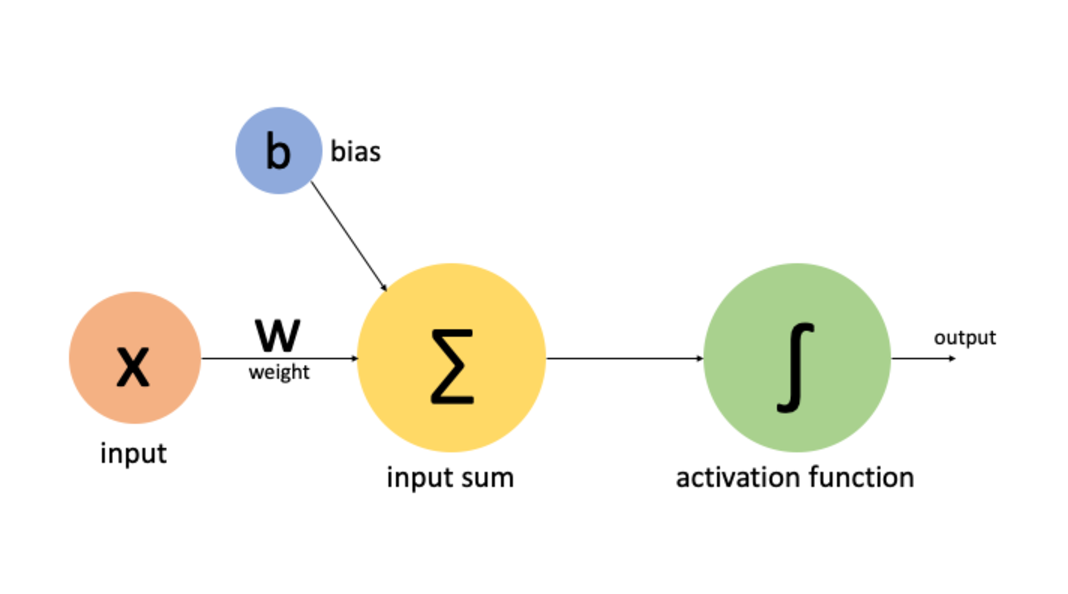

######Erro

- foi usado o calculo mais simples de erro:
  - erro = respostaCorreta - respostaCalculada

- Maneiras mais eficiente de fazer os cálculos do erro:
  - Mean square error (MSE)

  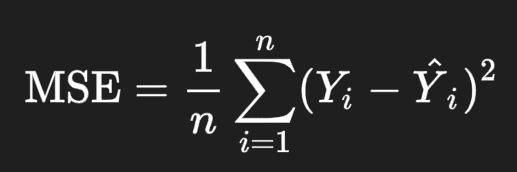
  - Root mean Square error (RMSE)

  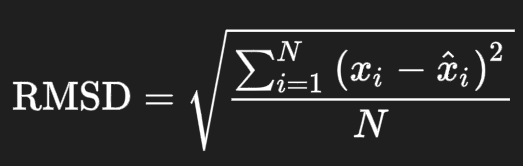


  - Média da diferença entre o esperado e o que foi previsto pela rede.

  - Erros maiores contam mais que erros menores

  - Penaliza erros maiores

Trabalhando com a camada de saída somente com um neuronio **porém** quando existe problemas **mais complexos** é necessário  colocar **mais neurônios na camada**.


#Deep learning (Aprendizagem profunda)

- Anos 90: Máquinas de vetores de suporte (SVM)
- A partir de 2006 foram criados algoritmos para treinamento de rede neurais
- Duas ou mais camadas escondidadas (redes profundas)
- São ultilizadas outras técnicas que aprendemos aqui.
- "Problema do gradiene desaparecendo" - vanishing gradient problem - gradiente fica muito pequeno, mudanças nos pesos ficam pequenas
- Outras funções de ativação
- Por onde seguir
  - Redes neurais convolucionais
  - Redes neurais recorrentes
  - Keras, Theano, TensorFlow
  - GPU


#Test Base de dados breast cancer

Test simples somente didatico.
usando a biblioteca sklearn
  - A scikit-learn não é ideal para criar redes neurais complexas, mas oferece suporte básico para redes neurais por meio do algoritmo MLPClassifier e MLPRegressor (Perceptrons Multicamadas). Esses modelos são úteis para tarefas de classificação e regressão que podem ser resolvidas com redes neurais simples.
  - Estamos usando ela somente para pegar os dataset.

In [2]:
import numpy as np
from sklearn import datasets # já tem algumas base de dados da https://archive.ics.uci.edu/

def sigmoid(soma):
  return 1 / (1 + np.exp(-soma))


def sigmoidDerivada(sig):
  return sig * (1 - sig)

base = datasets.load_breast_cancer()

entradas = base.data
ValoresSaidas = base.target
saidas = np.empty([569,1], dtype=int)

for i in range(569):
  saidas[i] = ValoresSaidas[i]

#pesos aleatorio

pesos0 = 2*np.random.random((30,3)) - 1
pesos1 = 2*np.random.random((3,1)) - 1

epocas = 100 #quantidade de vezes que eu vou passar as rodadas atualizando os pesos.
taxaAprendizagem = 0.3
momento = 1

for J in range(epocas):
  camadaEntrada = entradas
  somaSinapse0 = np.dot(camadaEntrada,pesos0)
  camadaOculta = sigmoid(somaSinapse0)

  somaSinapse1 = np.dot(camadaOculta,pesos1)
  camadaSaida = sigmoid(somaSinapse1)

#somando o erro
  erroCamadaSaida = saidas - camadaSaida
  mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
  print("Erro: " + str(mediaAbsoluta))

  derivadaSaida = sigmoidDerivada(camadaSaida)
  deltaSaida = erroCamadaSaida * derivadaSaida

  pesos1Transposta = pesos1.T
  deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)
  deltaCamadaOculta = deltaSaidaXPeso * sigmoidDerivada(camadaOculta)

  camadaOcultaTransposta = camadaOculta.T
  pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
  pesos1 = (pesos1 * momento) + (pesosNovo1 * taxaAprendizagem)

  camadaEntradaTransposta = camadaEntrada.T
  pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
  pesos0 = (pesos0 * momento) + (pesosNovo0 * taxaAprendizagem)


Erro: 0.46836847605293624
Erro: 0.46062993557808013
Erro: 0.5255369302849533
Erro: 0.37261763064810394
Erro: 0.3726179227824968
Erro: 0.37261821994547323
Erro: 0.3726185222677788
Erro: 0.3726188298847254
Erro: 0.37261914293639214
Erro: 0.3726194615678373
Erro: 0.37261978592932077
Erro: 0.3726201161765393
Erro: 0.37262045247087483
Erro: 0.3726207949796552
Erro: 0.3726211438764313
Erro: 0.37262149934126754
Erro: 0.37262186156105115
Erro: 0.37262223072981693
Erro: 0.3726226070490932
Erro: 0.3726229907282654
Erro: 0.37262338198496286
Erro: 0.37262378104546834
Erro: 0.3726241881451516
Erro: 0.3726246035289292
Erro: 0.37262502745175397
Erro: 0.37262546017913306
Erro: 0.37262590198767903
Erro: 0.3726263531656964
Erro: 0.37262681401380476
Erro: 0.3726272848456028
Erro: 0.37262776598837555
Erro: 0.3726282577838481
Erro: 0.37262876058899
Erro: 0.3726292747768738
Erro: 0.37262980073759167
Erro: 0.3726303388792367
Erro: 0.3726308896289511
Erro: 0.3726314534340499
Erro: 0.3726320307632236
Erro: 0.3

<ipython-input-2-73937e8361d9>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-soma))


#Redes neural com pybrain 1

In [1]:
!pip install pybrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybrain: filename=PyBrain-0.3-py3-none-any.whl size=399012 sha256=d9212e88c74cf97166a706cf98effaf4e8f69207ef12911d0f21120ab7969fc9
  Stored in directory: /root/.cache/pip/wheels/b8/2c/48/0bc43ab6e5265aaed857f484d4b224e66f1dce7d720bd98ea2
Successfully built pybrain


In [4]:
!git clone https://github.com/pybrain/pybrain.git
!cd pybrain && python setup.py install


fatal: destination path 'pybrain' already exists and is not an empty directory.
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'test_suite'
  warnings.warn(msg)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************

In [3]:
!pip install numpy scipy matplotlib

In [6]:
import os

# Clonar o repositório
!git clone https://github.com/pybrain/pybrain.git

# Alterar o diretório para pybrain
os.chdir('pybrain')

# Instalar o PyBrain
!python setup.py install


fatal: destination path 'pybrain' already exists and is not an empty directory.
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'test_suite'
  warnings.warn(msg)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************

###Necessário fazer algumas modificações na pasta pybrain para poder usar:

Onde estiver:
  - from scipy
mudar pra
 - from numpy

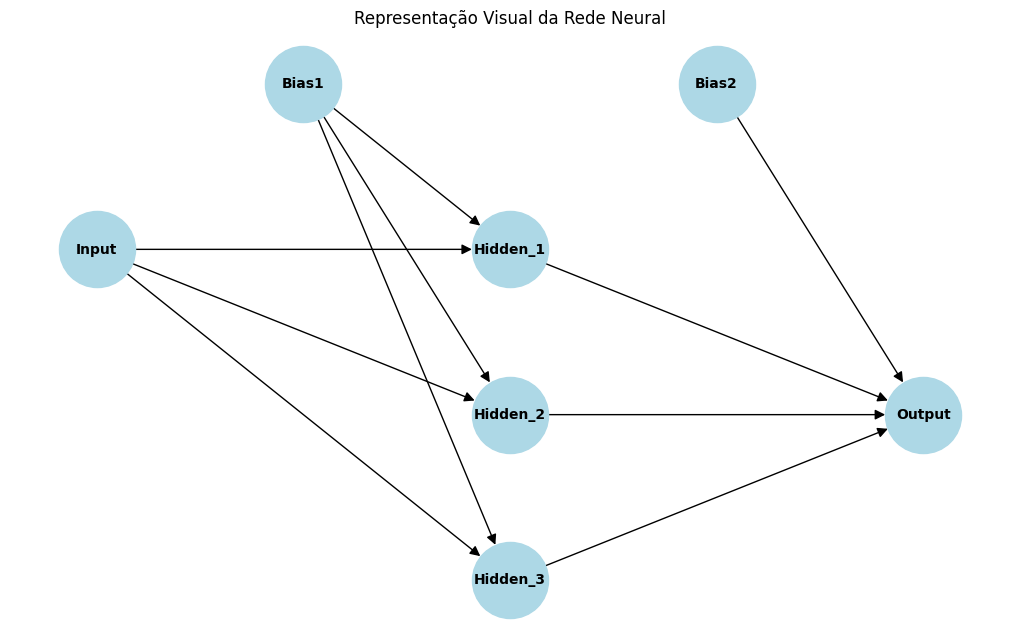

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
# Visualizar a estrutura da rede
G = nx.DiGraph()

# Adicionar nós
G.add_node("Input", pos=(0, 2))
for i in range(3):
    G.add_node(f"Hidden_{i+1}", pos=(1, 2 - i))
G.add_node("Output", pos=(2, 1))
G.add_node("Bias1", pos=(0.5, 3))
G.add_node("Bias2", pos=(1.5, 3))

# Adicionar arestas
for i in range(2):
    for j in range(3):
        G.add_edge("Input", f"Hidden_{j+1}")

for j in range(3):
    G.add_edge(f"Hidden_{j+1}", "Output")

for j in range(3):
    G.add_edge("Bias1", f"Hidden_{j+1}")

G.add_edge("Bias2", "Output")

# Obter posições para os nós
pos = nx.get_node_attributes(G, 'pos')

# Desenhar o gráfico
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=15)
plt.title("Representação Visual da Rede Neural")
plt.show()

A rede neural em código

In [62]:
from pybrain.structure import FeedForwardNetwork # Usando o structure que defini a estrutura da rede neural e estamos importando a classe feed forward que é o tipo da rede neural que estamos trabalhando.
from pybrain.structure import LinearLayer, SigmoidLayer, BiasUnit
from pybrain.structure import FullConnection

rede = FeedForwardNetwork()

camadaEntrada = LinearLayer(2)
camadaOculta = SigmoidLayer(3)
camadaSaida = SigmoidLayer(1)
bias1 = BiasUnit()
bias2 = BiasUnit()

rede.addModule(camadaEntrada)
rede.addModule(camadaOculta)
rede.addModule(camadaSaida)
rede.addModule(bias1)
rede.addModule(bias2)

entradaOculta = FullConnection(camadaEntrada, camadaOculta) #O fullConnection ele faz a conexão das camadas
ocultaSaida = FullConnection(camadaOculta, camadaSaida)

biasOculta = FullConnection(bias1, camadaOculta)
biasSaida = FullConnection(bias2, camadaSaida)

rede.sortModules()

print(rede)
print(entradaOculta.params)
print(ocultaSaida.params)
print(biasOculta.params)
print(biasSaida.params)

FeedForwardNetwork-127
   Modules:
    [<BiasUnit 'BiasUnit-123'>, <BiasUnit 'BiasUnit-126'>, <LinearLayer 'LinearLayer-122'>, <SigmoidLayer 'SigmoidLayer-124'>, <SigmoidLayer 'SigmoidLayer-125'>]
   Connections:
    []

[-0.09177851 -0.14403074 -0.73971001 -0.4155519   0.61018935  0.08283053]
[ 0.12797504 -0.73698533 -1.85897919]
[ 0.03384646 -1.61551015 -0.33733558]
[2.49659926]


#Redes Neurais com scikit-learn
fazer um teste com a biblioteca scikit-learn junto com a íriasdataset.

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

iris = datasets.load_iris()

entradas = iris.data
saidas = iris.target

redeNeural = MLPClassifier(verbose=True, max_iter=1000, tol=0.0001, activation='logistic')
redeNeural.fit(entradas, saidas)


Iteration 1, loss = 1.18565477
Iteration 2, loss = 1.16353566
Iteration 3, loss = 1.14393642
Iteration 4, loss = 1.12701485
Iteration 5, loss = 1.11287751
Iteration 6, loss = 1.10155095
Iteration 7, loss = 1.09293420
Iteration 8, loss = 1.08676545
Iteration 9, loss = 1.08262090
Iteration 10, loss = 1.07995169
Iteration 11, loss = 1.07815377
Iteration 12, loss = 1.07665354
Iteration 13, loss = 1.07498342
Iteration 14, loss = 1.07282689
Iteration 15, loss = 1.07002655
Iteration 16, loss = 1.06656297
Iteration 17, loss = 1.06251819
Iteration 18, loss = 1.05803628
Iteration 19, loss = 1.05328812
Iteration 20, loss = 1.04844349
Iteration 21, loss = 1.04365091
Iteration 22, loss = 1.03902462
Iteration 23, loss = 1.03463784
Iteration 24, loss = 1.03052133
Iteration 25, loss = 1.02666671
Iteration 26, loss = 1.02303332
Iteration 27, loss = 1.01955803
Iteration 28, loss = 1.01616639
Iteration 29, loss = 1.01278398
Iteration 30, loss = 1.00934630
Iteration 31, loss = 1.00580605
Iteration 32, los

MLPClassifier(activation='logistic', max_iter=1000, verbose=True)

#Referencia
Colab foi construito assistindo a aula do professor:
- Nome: Jones Granatyr
- linkedin: https://www.linkedin.com/in/jones-granatyr-15398397/